<a href="https://colab.research.google.com/github/Tharun0127/BTP/blob/main/Btp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np  # Import numpy for handling NaN values

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


data = pd.read_csv('data.csv')
data.head()


,Material,Length (ft),Height (ft),Aspect ratio,sheathing (mm),studs (depth x flange x t),YIELD STRESS,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),Ductillity
0,Gypsum,12.0,12,1.000000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2275.0,7.20,21.81,3.2,0.0,NaN
1,Gypsum,16.0,12,0.750000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1767.5,9.15,27.74,5.2,0.0,NaN
2,Gypsum,24.0,12,0.500000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2170.0,12.65,38.33,5.8,0.0,NaN
3,Gypsum,12.0,10,0.833333,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1802.5,6.53,19.80,3.6,0.0,NaN
4,Gypsum,16.0,10,0.625000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2537.5,8.27,25.06,3.3,0.0,NaN


In [45]:
data.shape

(420, 15)

In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material                    420 non-null    object 
 1   Length (ft)                 420 non-null    float64
 2   Height (ft)                 420 non-null    int64  
 3   Aspect ratio                420 non-null    float64
 4   sheathing (mm)              420 non-null    object 
 5   studs (depth x flange x t)  420 non-null    object 
 6   YIELD STRESS                363 non-null    float64
 7   Field spa (mm)              330 non-null    float64
 8   Perimeter spa (mm)          351 non-null    float64
 9   Stiffness (N/mm)            238 non-null    float64
 10  Elastic (kN)                188 non-null    float64
 11  ultimate (kN)               389 non-null    float64
 12  D elastic (mm)              160 non-null    float64
 13  D Ultimate (mm)             368 non

In [47]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print('-' * 50)


Unique values in 'Material':
['Gypsum' 'Cement plaster' 'Gypsum ' 'OPPFACE' 'CYCLIC Gypsum' 'Stucco'
 '2 layers gypsum' 'plywood and gypsum' 'CORRUG' 'CORRUG + GYP' 'STRAP'
 'CORRUG + OPENING' 'OSB' 'OSB + OPENING' 'CORRU + OPENING' 'CHIPBOARD'
 'GYP FIBER' 'CEMNT FIBER' 'CEM FIB + GYP FIB' 'CHIP + GYP FIB'
 'CORRU + GYP FIB' 'GYP + GYP' 'CALC' 'CALC + CALC' 'CALC '
 'STRAP X BRACE' 'GYPSUM' 'Strap + gypsum' 'OSB+OSB'
 'FIBERBOARD + FIBERBOARD' 'CEMENTBOARD + FIBERBOARD'
 'CB + WOOD FIBER CEMENT SHEET' 'CEMENT BONDED PANELS  + GYP FIBER'
 'GYP WALL BOARD + CALC SILIC BOARD' 'GYP WALL BOARD + MAGNISIUM BOARD'
 'GYPSUM INTERIOR SHEATHING' 'GYPSUM EXTERIOR SHEATHING' 'CEMENT BOARD'
 'FIBERCEMENT + FIBERCEMENT' 'FIBERCEMENT' 'PLYWOOD' 'IMPACT GYPSUM'
 'IMPACT GYPSUM ' 'STEEL SHEET' 'DOUBLE STOREY STEEL SHEET' 'SINGLE SHEET'
 'BOTH SHEET' 'STEEL - GYPSUM' 'STEEL - FIBER CEMENT BOARD'
 'GYPSUM+STEEL - GYPSUM' 'FCB + STEEL - GYPSUM' 'FCB + STEEL - FCB'
 'CORRUG  ' 'vertical Corrugated steel w

In [48]:

for column in data.columns:
    print(f"Group sizes for '{column}':")
    print(data.groupby(column).size())
    print('-' * 50)


Group sizes for 'Material':
Material
2 layers gypsum                                 1
BOTH SHEET                                      3
CALC                                           11
CALC                                            1
CALC + CALC                                     1
CB + WOOD FIBER CEMENT SHEET                    2
CEM FIB + GYP FIB                               3
CEMENT BOARD                                    4
CEMENT BONDED PANELS  + GYP FIBER               2
CEMENTBOARD + FIBERBOARD                        1
CEMNT FIBER                                     3
CHIP + GYP FIB                                  3
CHIPBOARD                                       9
CORRU + GYP FIB                                 3
CORRU + OPENING                                 4
CORRUG                                          5
CORRUG                                          8
CORRUG + GYP                                    5
CORRUG + OPENING                                1
CYCLIC Gypsum

In [49]:
for column in data.columns:
    print(f"Value counts for '{column}':")
    print(data[column].value_counts())
    print('-' * 50)

Value counts for 'Material':
Material
STEEL SHEET                                    98
Gypsum                                         73
OSB                                            31
GYPSUM                                         26
vertical Corrugated steel with slits           19
DOUBLE STOREY STEEL SHEET                      13
CALC                                           11
CHIPBOARD                                       9
CORRUG                                          8
PLYWOOD                                         8
GYPSUM INTERIOR SHEATHING                       6
GYP FIBER                                       6
Steel sheet + Gypsum - Gypsum                   6
CORRUG                                          5
CORRUG + GYP                                    5
Strap + gypsum                                  5
CEMENT BOARD                                    4
CORRU + OPENING                                 4
OSB + OPENING                                   3
BOTH SHEET  

**DATA CLEANING**

---

In [50]:
df = data.copy()
df.columns = df.columns.str.strip().str.lower()
df.head()

,material,length (ft),height (ft),aspect ratio,sheathing (mm),studs (depth x flange x t),yield stress,field spa (mm),perimeter spa (mm),stiffness (n/mm),elastic (kn),ultimate (kn),d elastic (mm),d ultimate (mm),ductillity
0,Gypsum,12.0,12,1.000000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2275.0,7.20,21.81,3.2,0.0,NaN
1,Gypsum,16.0,12,0.750000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1767.5,9.15,27.74,5.2,0.0,NaN
2,Gypsum,24.0,12,0.500000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2170.0,12.65,38.33,5.8,0.0,NaN
3,Gypsum,12.0,10,0.833333,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1802.5,6.53,19.80,3.6,0.0,NaN
4,Gypsum,16.0,10,0.625000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2537.5,8.27,25.06,3.3,0.0,NaN


In [51]:
null_values = df.isnull().sum()
null_values

,0
material,0
length (ft),0
height (ft),0
aspect ratio,0
sheathing (mm),0
studs (depth x flange x t),0
yield stress,57
field spa (mm),90
perimeter spa (mm),69
stiffness (n/mm),182


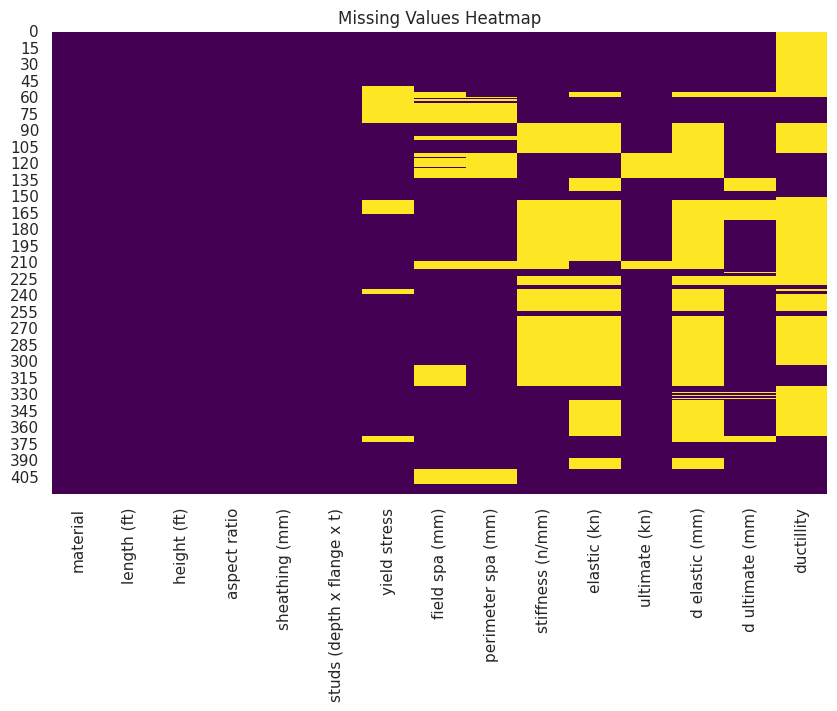

In [52]:
# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

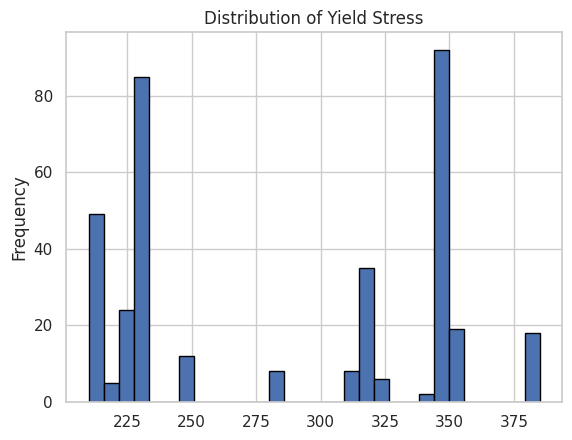

In [53]:
df['yield stress'].plot(kind='hist', bins=30, edgecolor='black', title='Distribution of Yield Stress')
plt.show()


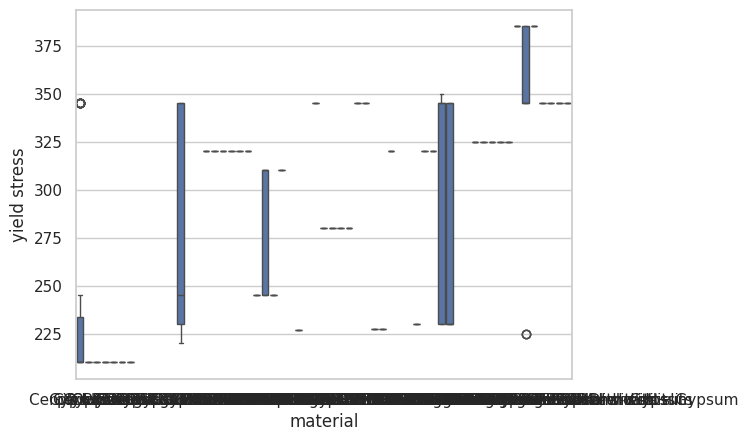

In [54]:
sns.boxplot(x='material', y='yield stress', data=df)
plt.show()

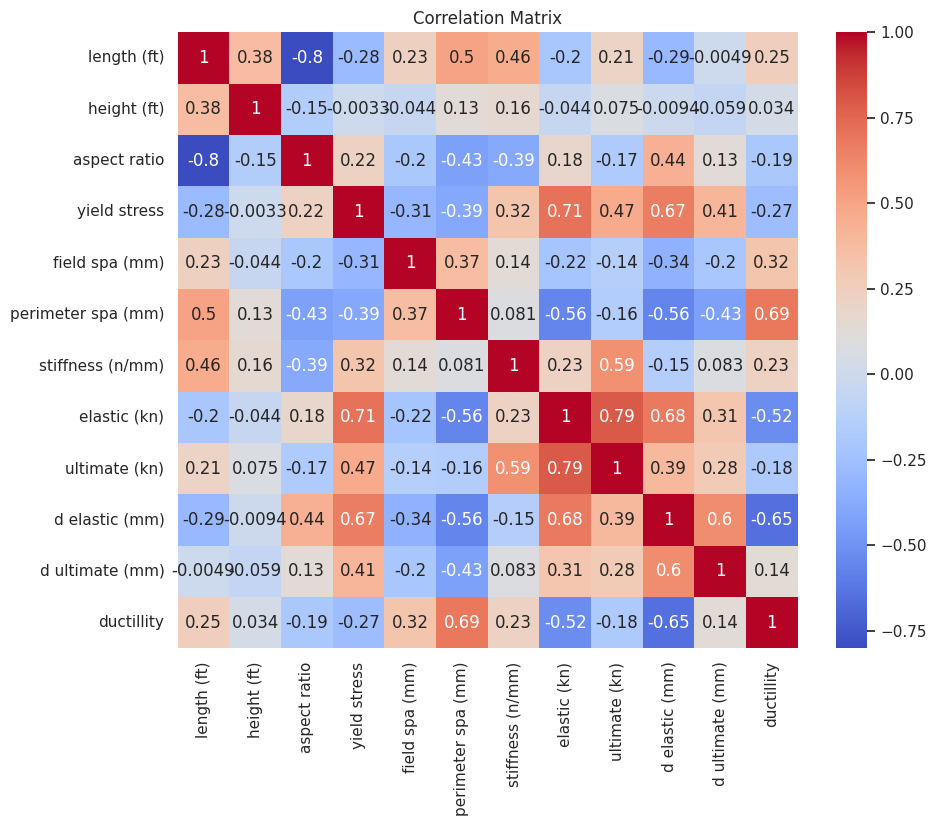

In [55]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[float, int])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
numerical_columns = df.select_dtypes(include=[float, int])
from sklearn.impute import KNNImputer
# KNN imputer for numerical columns with missing values
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(numerical_columns)
df[numerical_columns.columns] = df_imputed

print(df.isnull().sum())

material                      0
length (ft)                   0
height (ft)                   0
aspect ratio                  0
sheathing (mm)                0
studs (depth x flange x t)    0
yield stress                  0
field spa (mm)                0
perimeter spa (mm)            0
stiffness (n/mm)              0
elastic (kn)                  0
ultimate (kn)                 0
d elastic (mm)                0
d ultimate (mm)               0
ductillity                    0
dtype: int64


In [57]:
df.head()

,material,length (ft),height (ft),aspect ratio,sheathing (mm),studs (depth x flange x t),yield stress,field spa (mm),perimeter spa (mm),stiffness (n/mm),elastic (kn),ultimate (kn),d elastic (mm),d ultimate (mm),ductillity
0,Gypsum,12.0,12.0,1.000000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2275.0,7.20,21.81,3.2,0.0,3.212
1,Gypsum,16.0,12.0,0.750000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1767.5,9.15,27.74,5.2,0.0,4.432
2,Gypsum,24.0,12.0,0.500000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2170.0,12.65,38.33,5.8,0.0,4.174
3,Gypsum,12.0,10.0,0.833333,12.7,88.9 x - x 0.81,210.0,305.0,305.0,1802.5,6.53,19.80,3.6,0.0,3.550
4,Gypsum,16.0,10.0,0.625000,12.7,88.9 x - x 0.81,210.0,305.0,305.0,2537.5,8.27,25.06,3.3,0.0,2.402


In [58]:
# Check the data types of all columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Count the number of categorical columns
num_categorical_columns = len(categorical_columns)

print(f"Number of categorical columns: {num_categorical_columns}")
print("Categorical columns:", categorical_columns)

Number of categorical columns: 3
Categorical columns: Index(['material', 'sheathing (mm)', 'studs (depth x flange x t)'], dtype='object')


`**Label Encoding**`

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['material'] = label_encoder.fit_transform(df['material'])
df['sheathing (mm)'] = label_encoder.fit_transform(df['sheathing (mm)'].astype(str))  # Ensure it's treated as string
df['studs (depth x flange x t)'] = label_encoder.fit_transform(df['studs (depth x flange x t)'].astype(str))  # Ensure it's treated as string

df.head()


,material,length (ft),height (ft),aspect ratio,sheathing (mm),studs (depth x flange x t),yield stress,field spa (mm),perimeter spa (mm),stiffness (n/mm),elastic (kn),ultimate (kn),d elastic (mm),d ultimate (mm),ductillity
0,35,12.0,12.0,1.000000,31,17,210.0,305.0,305.0,2275.0,7.20,21.81,3.2,0.0,3.212
1,35,16.0,12.0,0.750000,31,17,210.0,305.0,305.0,1767.5,9.15,27.74,5.2,0.0,4.432
2,35,24.0,12.0,0.500000,31,17,210.0,305.0,305.0,2170.0,12.65,38.33,5.8,0.0,4.174
3,35,12.0,10.0,0.833333,31,17,210.0,305.0,305.0,1802.5,6.53,19.80,3.6,0.0,3.550
4,35,16.0,10.0,0.625000,31,17,210.0,305.0,305.0,2537.5,8.27,25.06,3.3,0.0,2.402


**SGD REGRESSOR**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare features (X) and target variables (y)
X = df.drop(['ultimate (kn)', 'd ultimate (mm)'], axis=1)  # Drop the target columns
y_ultimate = df['ultimate (kn)']
y_d_ultimate = df['d ultimate (mm)']

# Step 2: Train/Test Split
X_train, X_test, y_train_ultimate, y_test_ultimate = train_test_split(X, y_ultimate, test_size=0.2, random_state=42)
X_train, X_test, y_train_d_ultimate, y_test_d_ultimate = train_test_split(X, y_d_ultimate, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (important for SGD Regressor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SGD Regressor
sgd_regressor_ultimate = SGDRegressor(max_iter=1000, tol=1e-3)  # Set max iterations and tolerance
sgd_regressor_ultimate.fit(X_train_scaled, y_train_ultimate)

sgd_regressor_d_ultimate = SGDRegressor(max_iter=1000, tol=1e-3)  # Set max iterations and tolerance
sgd_regressor_d_ultimate.fit(X_train_scaled, y_train_d_ultimate)

# Step 5: Predictions
y_pred_ultimate = sgd_regressor_ultimate.predict(X_test_scaled)
y_pred_d_ultimate = sgd_regressor_d_ultimate.predict(X_test_scaled)

# Step 6: Evaluate the Model (R² and MSE)
print("Ultimate (kN) - R² score:", r2_score(y_test_ultimate, y_pred_ultimate))
print("Ultimate (kN) - Mean Squared Error:", mean_squared_error(y_test_ultimate, y_pred_ultimate))

print("D Ultimate (mm) - R² score:", r2_score(y_test_d_ultimate, y_pred_d_ultimate))
print("D Ultimate (mm) - Mean Squared Error:", mean_squared_error(y_test_d_ultimate, y_pred_d_ultimate))


Ultimate (kN) - R² score: 0.32155380276590906
Ultimate (kN) - Mean Squared Error: 181.00593052115082
D Ultimate (mm) - R² score: 0.4684625844824081
D Ultimate (mm) - Mean Squared Error: 795.2580497434312


In [61]:
y_train = pd.concat([y_train_ultimate, y_train_d_ultimate], axis=1)
y_test = pd.concat([y_test_ultimate, y_test_d_ultimate], axis=1)


y_test.columns


Index(['ultimate (kn)', 'd ultimate (mm)'], dtype='object')

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    'estimator__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'estimator__max_iter': [1000, 2000],         # Number of iterations
    'estimator__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization type
    'estimator__learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate
    'estimator__tol': [1e-4, 1e-3]              # Tolerance for stopping criteria
}

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor()

# Wrap SGDRegressor in a MultiOutputRegressor
multioutput_regressor = MultiOutputRegressor(sgd_regressor)

# Set up GridSearchCV
grid_search = GridSearchCV(multioutput_regressor, param_grid, cv=5, n_jobs=-1, verbose=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model for both target variables
print("Ultimate (kn) - R² score: ", best_model.score(X_test_scaled, y_test[['ultimate (kn)', 'd ultimate (mm)']]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test['ultimate (kn)'], y_pred[:, 0]))

print("D Ultimate (mm) - R² score: ", best_model.score(X_test_scaled, y_test[['ultimate (kn)', 'd ultimate (mm)']]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test['d ultimate (mm)'], y_pred[:, 1]))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'estimator__alpha': 0.0001, 'estimator__learning_rate': 'invscaling', 'estimator__max_iter': 2000, 'estimator__penalty': 'elasticnet', 'estimator__tol': 0.001}
Best cross-validation score:  0.41995457267654207
Ultimate (kn) - R² score:  0.39647185903006055
Ultimate (kn) - Mean Squared Error:  180.28184816557837
D Ultimate (mm) - R² score:  0.39647185903006055
D Ultimate (mm) - Mean Squared Error:  794.9388823341571


**RandomForest Regressor**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Wrap it with MultiOutputRegressor for multi-output regression
multioutput_rf_regressor = MultiOutputRegressor(rf_regressor)

# Train the model on training data
multioutput_rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = multioutput_rf_regressor.predict(X_test_scaled)

# Evaluate the model using all outputs (multi-output targets)
print("R² score (All Outputs): ", multioutput_rf_regressor.score(X_test_scaled, y_test))

# Calculate individual R² scores for each target (Ultimate (kn) and D Ultimate (mm))
r2_ultimate_kn = r2_score(y_test['ultimate (kn)'], y_pred_rf[:, 0])
r2_d_ultimate_mm = r2_score(y_test['d ultimate (mm)'], y_pred_rf[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm)


R² score (All Outputs):  0.7396334323267243
Ultimate (kn) - R² score:  0.7837050513202488
D Ultimate (mm) - R² score:  0.6955618133331998


**LinearRegression**

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
lr_regressor = LinearRegression()

# Wrap it with MultiOutputRegressor
multioutput_lr_regressor = MultiOutputRegressor(lr_regressor)

# Fit the model
multioutput_lr_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = multioutput_lr_regressor.predict(X_test_scaled)

# Evaluate the model
print("R² score (All Outputs): ", multioutput_lr_regressor.score(X_test_scaled, y_test))

# Individual R² scores for each target
r2_ultimate_kn_lr = r2_score(y_test[['ultimate (kn)']], y_pred_lr[:, 0])
r2_d_ultimate_mm_lr = r2_score(y_test[['d ultimate (mm)']], y_pred_lr[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn_lr)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm_lr)

# Mean Squared Error for each target
mse_ultimate_kn_lr = mean_squared_error(y_test['ultimate (kn)'], y_pred_lr[:, 0])
mse_d_ultimate_mm_lr = mean_squared_error(y_test['d ultimate (mm)'], y_pred_lr[:, 1])

print("Ultimate (kn) - Mean Squared Error: ", mse_ultimate_kn_lr)
print("D Ultimate (mm) - Mean Squared Error: ", mse_d_ultimate_mm_lr)


R² score (All Outputs):  0.3935380002065378
Ultimate (kn) - R² score:  0.3167885716402442
D Ultimate (mm) - R² score:  0.47028742877283136
Ultimate (kn) - Mean Squared Error:  182.2772694977207
D Ultimate (mm) - Mean Squared Error:  792.5278146383929


**RandomForestRegressor**

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_regressor = RandomForestRegressor()

# Wrap it with MultiOutputRegressor
multioutput_rf_regressor = MultiOutputRegressor(rf_regressor)

# Fit the model
multioutput_rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = multioutput_rf_regressor.predict(X_test_scaled)

# Evaluate the model
print("R² score (All Outputs): ", multioutput_rf_regressor.score(X_test_scaled, y_test))

# Individual R² scores for each target
r2_ultimate_kn_rf = r2_score(y_test[['ultimate (kn)']], y_pred_rf[:, 0])
r2_d_ultimate_mm_rf = r2_score(y_test[['d ultimate (mm)']], y_pred_rf[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn_rf)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm_rf)

# Mean Squared Error for each target
mse_ultimate_kn_rf = mean_squared_error(y_test['ultimate (kn)'], y_pred_rf[:, 0])
mse_d_ultimate_mm_rf = mean_squared_error(y_test['d ultimate (mm)'], y_pred_rf[:, 1])

print("Ultimate (kn) - Mean Squared Error: ", mse_ultimate_kn_rf)
print("D Ultimate (mm) - Mean Squared Error: ", mse_d_ultimate_mm_rf)


R² score (All Outputs):  0.7038838912337393
Ultimate (kn) - R² score:  0.7742593805120896
D Ultimate (mm) - R² score:  0.6335084019553888
Ultimate (kn) - Mean Squared Error:  60.22642776009517
D Ultimate (mm) - Mean Squared Error:  548.3252636590075


**GradientBoostingRegressor**

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_regressor = GradientBoostingRegressor()

# Wrap it with MultiOutputRegressor
multioutput_gb_regressor = MultiOutputRegressor(gb_regressor)

# Fit the model
multioutput_gb_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = multioutput_gb_regressor.predict(X_test_scaled)

# Evaluate the model
print("R² score (All Outputs): ", multioutput_gb_regressor.score(X_test_scaled, y_test))

# Individual R² scores for each target
r2_ultimate_kn_gb = r2_score(y_test[['ultimate (kn)']], y_pred_gb[:, 0])
r2_d_ultimate_mm_gb = r2_score(y_test[['d ultimate (mm)']], y_pred_gb[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn_gb)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm_gb)

# Mean Squared Error for each target
mse_ultimate_kn_gb = mean_squared_error(y_test['ultimate (kn)'], y_pred_gb[:, 0])
mse_d_ultimate_mm_gb = mean_squared_error(y_test['d ultimate (mm)'], y_pred_gb[:, 1])

print("Ultimate (kn) - Mean Squared Error: ", mse_ultimate_kn_gb)
print("D Ultimate (mm) - Mean Squared Error: ", mse_d_ultimate_mm_gb)


R² score (All Outputs):  0.7725106272658824
Ultimate (kn) - R² score:  0.7982991971089564
D Ultimate (mm) - R² score:  0.7467220574228085
Ultimate (kn) - Mean Squared Error:  53.812729237775514
D Ultimate (mm) - Mean Squared Error:  378.9410054244804


**xgboost**

In [67]:
import xgboost as xgb

# Initialize the model
xgb_regressor = xgb.XGBRegressor()

# Wrap it with MultiOutputRegressor
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Fit the model
multioutput_xgb_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = multioutput_xgb_regressor.predict(X_test_scaled)

# Evaluate the model
print("R² score (All Outputs): ", multioutput_xgb_regressor.score(X_test_scaled, y_test))

# Individual R² scores for each target
r2_ultimate_kn_xgb = r2_score(y_test[['ultimate (kn)']], y_pred_xgb[:, 0])
r2_d_ultimate_mm_xgb = r2_score(y_test[['d ultimate (mm)']], y_pred_xgb[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn_xgb)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm_xgb)

# Mean Squared Error for each target
mse_ultimate_kn_xgb = mean_squared_error(y_test['ultimate (kn)'], y_pred_xgb[:, 0])
mse_d_ultimate_mm_xgb = mean_squared_error(y_test['d ultimate (mm)'], y_pred_xgb[:, 1])

print("Ultimate (kn) - Mean Squared Error: ", mse_ultimate_kn_xgb)
print("D Ultimate (mm) - Mean Squared Error: ", mse_d_ultimate_mm_xgb)


R² score (All Outputs):  0.739319384098053
Ultimate (kn) - R² score:  0.8235149383544922
D Ultimate (mm) - R² score:  0.6551238298416138
Ultimate (kn) - Mean Squared Error:  47.0853058653859
D Ultimate (mm) - Mean Squared Error:  515.9854053841128


**KNeighborsRegressor**

In [68]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_regressor = KNeighborsRegressor()

# Wrap it with MultiOutputRegressor
multioutput_knn_regressor = MultiOutputRegressor(knn_regressor)

# Fit the model
multioutput_knn_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = multioutput_knn_regressor.predict(X_test_scaled)

# Evaluate the model
print("R² score (All Outputs): ", multioutput_knn_regressor.score(X_test_scaled, y_test))

# Individual R² scores for each target
r2_ultimate_kn_knn = r2_score(y_test[['ultimate (kn)']], y_pred_knn[:, 0])
r2_d_ultimate_mm_knn = r2_score(y_test[['d ultimate (mm)']], y_pred_knn[:, 1])

print("Ultimate (kn) - R² score: ", r2_ultimate_kn_knn)
print("D Ultimate (mm) - R² score: ", r2_d_ultimate_mm_knn)

# Mean Squared Error for each target
mse_ultimate_kn_knn = mean_squared_error(y_test['ultimate (kn)'], y_pred_knn[:, 0])
mse_d_ultimate_mm_knn = mean_squared_error(y_test['d ultimate (mm)'], y_pred_knn[:, 1])

print("Ultimate (kn) - Mean Squared Error: ", mse_ultimate_kn_knn)
print("D Ultimate (mm) - Mean Squared Error: ", mse_d_ultimate_mm_knn)


R² score (All Outputs):  0.79258003156858
Ultimate (kn) - R² score:  0.7939275792972071
D Ultimate (mm) - R² score:  0.7912324838399529
Ultimate (kn) - Mean Squared Error:  54.97905422142855
D Ultimate (mm) - Mean Squared Error:  312.3468694852857


**DecisionTreeRegressor**

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
dt_regressor = DecisionTreeRegressor()

# Wrap it with MultiOutputRegressor
multioutput_dt_regressor = MultiOutputRegressor(dt_regressor)

# Fit the model
multioutput_dt_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = multioutput_dt_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_dt[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_dt[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_dt[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_dt[:, 1]))


Ultimate (kn) - R² score:  0.6595664885099272
D Ultimate (mm) - R² score:  0.4943498317322004
Ultimate (kn) - Mean Squared Error:  90.82589714417989
D Ultimate (mm) - Mean Squared Error:  756.5269253482672


**AdaBoostRegressor**

In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
ada_regressor = AdaBoostRegressor()

# Wrap it with MultiOutputRegressor
multioutput_ada_regressor = MultiOutputRegressor(ada_regressor)

# Fit the model
multioutput_ada_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ada = multioutput_ada_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_ada[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_ada[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_ada[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_ada[:, 1]))


Ultimate (kn) - R² score:  0.7050857212795307
D Ultimate (mm) - R² score:  0.8015019496379109
Ultimate (kn) - Mean Squared Error:  78.68160166775012
D Ultimate (mm) - Mean Squared Error:  296.98224019679355


**lightgbm**

In [71]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lgb_regressor = lgb.LGBMRegressor()

# Wrap it with MultiOutputRegressor
multioutput_lgb_regressor = MultiOutputRegressor(lgb_regressor)

# Fit the model
multioutput_lgb_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgb = multioutput_lgb_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_lgb[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_lgb[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_lgb[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_lgb[:, 1]))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 12
[LightGBM] [Info] Start training from score 28.263568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**ElasticNet**

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
en_regressor = ElasticNet()

# Wrap it with MultiOutputRegressor
multioutput_en_regressor = MultiOutputRegressor(en_regressor)

# Fit the model
multioutput_en_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_en = multioutput_en_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_en[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_en[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_en[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_en[:, 1]))


Ultimate (kn) - R² score:  0.3462260853375987
D Ultimate (mm) - R² score:  0.24136614062909656
Ultimate (kn) - Mean Squared Error:  174.42349335343457
D Ultimate (mm) - Mean Squared Error:  1135.0276873456894


**ridge_regressor**

In [73]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
ridge_regressor = Ridge()

# Wrap it with MultiOutputRegressor
multioutput_ridge_regressor = MultiOutputRegressor(ridge_regressor)

# Fit the model
multioutput_ridge_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = multioutput_ridge_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_ridge[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_ridge[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_ridge[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_ridge[:, 1]))


Ultimate (kn) - R² score:  0.31842866651029733
D Ultimate (mm) - R² score:  0.4685625489971038
Ultimate (kn) - Mean Squared Error:  181.8397006834106
D Ultimate (mm) - Mean Squared Error:  795.1084881459226


**lasso_regressor**

In [74]:
from sklearn.linear_model import Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lasso_regressor = Lasso()

# Wrap it with MultiOutputRegressor
multioutput_lasso_regressor = MultiOutputRegressor(lasso_regressor)

# Fit the model
multioutput_lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = multioutput_lasso_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_lasso[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_lasso[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_lasso[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_lasso[:, 1]))


Ultimate (kn) - R² score:  0.3912636098860962
D Ultimate (mm) - R² score:  0.4025186978059352
Ultimate (kn) - Mean Squared Error:  162.40771513475704
D Ultimate (mm) - Mean Squared Error:  893.9197905350312


**ExtraTreesRegressor**

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
et_regressor = ExtraTreesRegressor()

# Wrap it with MultiOutputRegressor
multioutput_et_regressor = MultiOutputRegressor(et_regressor)

# Fit the model
multioutput_et_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_et = multioutput_et_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_et[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_et[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_et[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_et[:, 1]))


Ultimate (kn) - R² score:  0.872040973474589
D Ultimate (mm) - R² score:  0.8774312426771446
Ultimate (kn) - Mean Squared Error:  34.13880534556384
D Ultimate (mm) - Mean Squared Error:  183.38086475649777


**HYPER TUNING EXTRATREE**

In [86]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    "estimator__n_estimators": [50, 100],
    "estimator__max_depth": [10, None],
    "estimator__min_samples_split": [2, 5],
    "estimator__min_samples_leaf": [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=MultiOutputRegressor(ExtraTreesRegressor()),
    param_grid=param_grid,
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and evaluate as before
print("Best Parameters: ", grid_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}


**THE BEST RESULT**

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using the best model
best_model = random_search.best_estimator_
y_pred_et_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_et_tuned[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_et_tuned[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_et_tuned[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_et_tuned[:, 1]))


Ultimate (kn) - R² score:  0.8644864001709063
D Ultimate (mm) - R² score:  0.839644948504562
Ultimate (kn) - Mean Squared Error:  36.15432636417678
D Ultimate (mm) - Mean Squared Error:  239.9147111677766


**bayesian_regressor**


In [82]:
from sklearn.linear_model import BayesianRidge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
bayesian_regressor = BayesianRidge()

# Wrap it with MultiOutputRegressor
multioutput_bayesian_regressor = MultiOutputRegressor(bayesian_regressor)

# Fit the model
multioutput_bayesian_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_bayesian = multioutput_bayesian_regressor.predict(X_test_scaled)

# Evaluate the model
print("Ultimate (kn) - R² score: ", r2_score(y_test[['ultimate (kn)']], y_pred_bayesian[:, 0]))
print("D Ultimate (mm) - R² score: ", r2_score(y_test[['d ultimate (mm)']], y_pred_bayesian[:, 1]))
print("Ultimate (kn) - Mean Squared Error: ", mean_squared_error(y_test[['ultimate (kn)']], y_pred_bayesian[:, 0]))
print("D Ultimate (mm) - Mean Squared Error: ", mean_squared_error(y_test[['d ultimate (mm)']], y_pred_bayesian[:, 1]))


Ultimate (kn) - R² score:  0.3306860006331679
D Ultimate (mm) - R² score:  0.45161219587520207
Ultimate (kn) - Mean Squared Error:  178.56950744234905
D Ultimate (mm) - Mean Squared Error:  820.4687062089536
